In [1]:
import pandas as pd
from datetime import datetime

# Чтение данных из файла log.csv
try:
    df = pd.read_csv('log.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()


    # Convert 'timestamp' to numeric, handling errors and coercing invalid values to NaN
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')

    # Remove rows with NaN values in 'timestamp'
df = df.dropna(subset=['timestamp'])

    # Convert 'timestamp' to datetime format
df['datetime'] = df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

    # Print information about the DataFrame before sorting
print("DataFrame before sorting:")
print(df.head())

df.to_csv('log_datetime.csv', index=False)
print("Data saved successfully to log_datetime.csv")


OSError: [Errno 22] Invalid argument

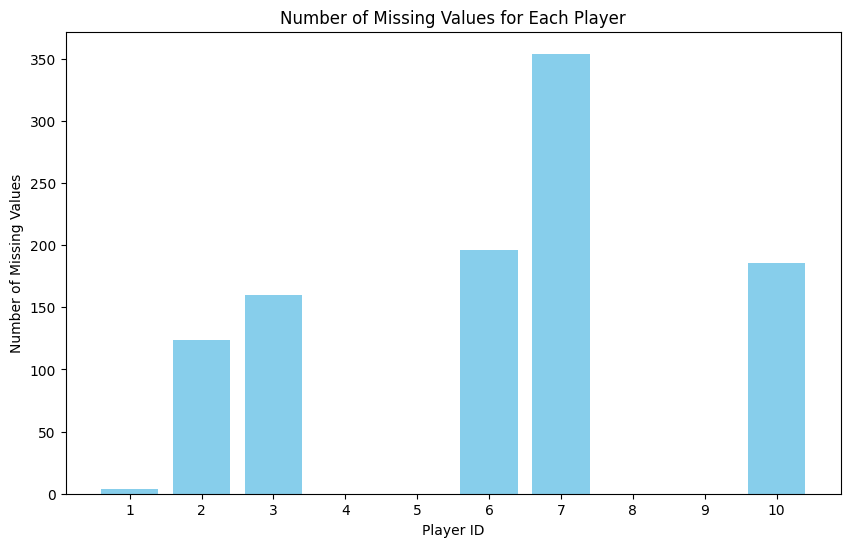

In [2]:
# Разбиение данных по игрокам
for index, row in df_sorted.iterrows():
    player_id = str(int(row['id']))  # Приведение id к int и затем к str
    players[player_id].append(row[['timestamp', 'id', 'x', 'y']])

# Подсчет пропусков и создание DataFrame
missing_counts = {}
for player_id, player_data in players.items():
    if not player_data:
        missing_counts[player_id] = 0
    else:
        player_df = pd.concat(player_data, axis=1).T
        missing_counts[player_id] = player_df[['x', 'y']].isnull().sum().sum()

# Создание barplot
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.keys(), missing_counts.values(), color='skyblue')
plt.title('Number of Missing Values for Each Player')
plt.xlabel('Player ID')
plt.ylabel('Number of Missing Values')
plt.show()


In [6]:
from datetime import datetime

In [7]:
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')  # Преобразование timestamp в числовой формат
df['datetime'] = df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_sorted = df.sort_values(by='timestamp')



In [8]:
df['datetime']

0       2024-01-29 14:05:18
1       2024-01-29 14:05:33
2       2024-01-29 14:09:05
3       2024-01-29 14:09:12
4       2024-01-29 14:09:19
               ...         
1280    2024-01-29 14:41:32
1281    2024-01-29 14:41:33
1282    2024-01-29 14:41:34
1283    2024-01-29 14:41:38
1284    2024-01-29 14:41:42
Name: datetime, Length: 1285, dtype: object

In [10]:
# Разбиение данных по игрокам
for index, row in df_sorted.iterrows():
    player_id = str(int(row['id']))  # Приведение id к int и затем к str
    players[player_id].append(row[['timestamp', 'datetime', 'id', 'x', 'y']])

# Подсчет пропусков и создание DataFrame
missing_counts = {}
min_max_times = {}

for player_id, player_data in players.items():
    if not player_data:
        missing_counts[player_id] = 0
        min_max_times[player_id] = {'min_time': None, 'max_time': None}
    else:
        player_df = pd.concat(player_data, axis=1).T
        missing_counts[player_id] = player_df[['x', 'y']].isnull().sum().sum()
        min_max_times[player_id] = {
            'min_time': player_df['datetime'].min(),
            'max_time': player_df['datetime'].max()
        }

# Создание barplot с указанием минимального и максимального времени
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_counts.keys(), missing_counts.values(), color='skyblue')

# Добавление аннотаций с минимальным и максимальным временем
for bar, player_id in zip(bars, missing_counts.keys()):
    annotation_text = f"Min Time: {min_max_times[player_id]['min_time']}\nMax Time: {min_max_times[player_id]['max_time']}"
    plt.annotate(annotation_text, (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=8, color='black')

plt.title('Number of Missing Values for Each Player')
plt.xlabel('Player ID')
plt.ylabel('Number of Missing Values')
plt.show()


TypeError: '<=' not supported between instances of 'float' and 'str'

In [1]:
import pandas as pd
from datetime import datetime

# Чтение данных из файла log.csv
try:
    df = pd.read_csv('log.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("An error occurred while reading the file:", e)
    exit()

# Преобразование данных в список кортежей для сортировки
try:
    df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')  # Преобразование timestamp в числовой формат
    df['datetime'] = df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') if not pd.isnull(x) else None)
    df_sorted = df.sort_values(by='timestamp')
except Exception as e:
    print("An error occurred during data processing:", e)
    exit()

# Сохранение отсортированных данных в CSV файл
try:
    df_sorted.to_csv('log_datetime.csv', index=False)
    print("Data saved successfully to log_datetime.csv")
except OSError as e:
    print("Error occurred while saving the file:", e)
except NameError:
    print("DataFrame df_sorted is not defined. Check if there was an error during data processing.")
except Exception as e:
    print("An unexpected error occurred:", e)


An error occurred during data processing: [Errno 22] Invalid argument
DataFrame df_sorted is not defined. Check if there was an error during data processing.


: 

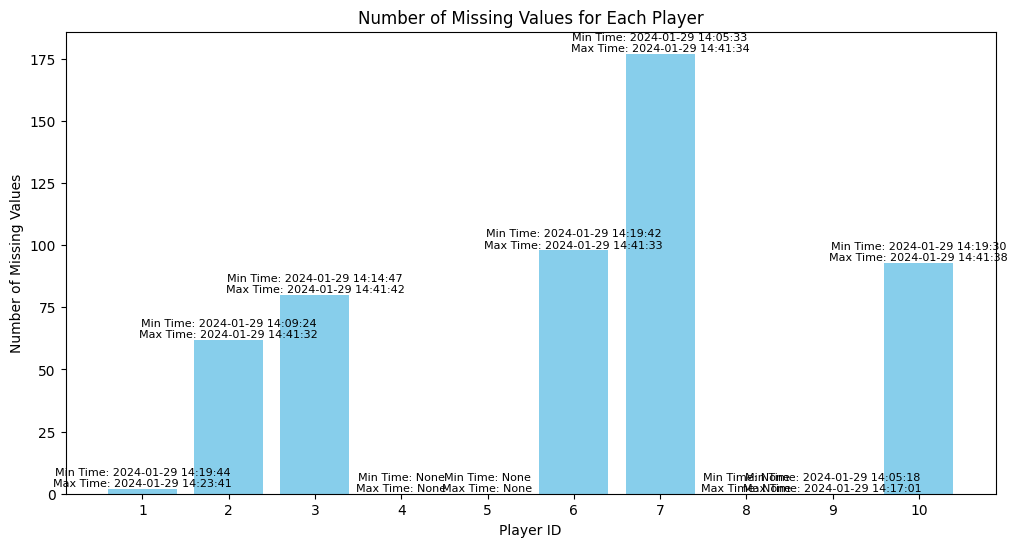

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Чтение данных из файла log.csv
df = pd.read_csv('log.csv')

# Преобразование данных в список кортежей для сортировки
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')  # Преобразование timestamp в числовой формат
df['datetime'] = df['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
df_sorted = df.sort_values(by='timestamp')

df.to_csv('log_datime.csv')

# Инициализация списков для данных игроков
players = {str(int(i)): [] for i in range(1, 11)}  # Приведение id к int и затем к str

# Разбиение данных по игрокам
for index, row in df_sorted.iterrows():
    player_id = str(int(row['id']))  # Приведение id к int и затем к str
    players[player_id].append(row[['timestamp', 'datetime', 'id', 'x', 'y']])

# Подсчет пропусков и создание DataFrame
missing_counts = {}
min_max_times = {}

for player_id, player_data in players.items():
    if not player_data:
        missing_counts[player_id] = 0
        min_max_times[player_id] = {'min_time': None, 'max_time': None}
    else:
        player_df = pd.concat(player_data, axis=1).T
        missing_counts[player_id] = player_df[['x', 'y']].isnull().sum().sum()
        min_max_times[player_id] = {
            'min_time': min(player_df['datetime'], key=pd.to_datetime),
            'max_time': max(player_df['datetime'], key=pd.to_datetime)
        }

# Создание barplot с указанием минимального и максимального времени
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_counts.keys(), missing_counts.values(), color='skyblue')

# Добавление аннотаций с минимальным и максимальным временем
for bar, player_id in zip(bars, missing_counts.keys()):
    annotation_text = f"Min Time: {min_max_times[player_id]['min_time']}\nMax Time: {min_max_times[player_id]['max_time']}"
    plt.annotate(annotation_text, (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=8, color='black')

plt.title('Number of Missing Values for Each Player')
plt.xlabel('Player ID')
plt.ylabel('Number of Missing Values')
plt.show()


In [23]:
import pandas as pd

# Чтение данных из файла
with open('data (1).txt', 'r') as file:
    data = [eval(line.strip()) for line in file]

# Создание DataFrame
df = pd.DataFrame(data)

df['order'] = df.groupby('key4').cumcount() + 1

# Переименование столбцов
df.rename(columns={'key2': 'x', 'key3': 'y', 'key4': 'id'}, inplace=True)

# Добавление столбца с текущей датой и временем
# df['datetime'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Вывод результата
print(df)

      key1     x     y  id  order
0      -63  30.0  30.0   9      1
1      -73  30.0  30.0   7      1
2      -74  30.0  30.0   6      1
3      -67  30.0  30.0   9      2
4      -77  30.0  30.0   6      2
...    ...   ...   ...  ..    ...
5593   -83  30.0  10.0   2    981
5594   -88  30.0  50.0   3    898
5595   -79   0.0  10.0   2    982
5596   -83   7.5   0.0   7   1942
5597   -78  15.0  60.0  10    628

[5598 rows x 5 columns]


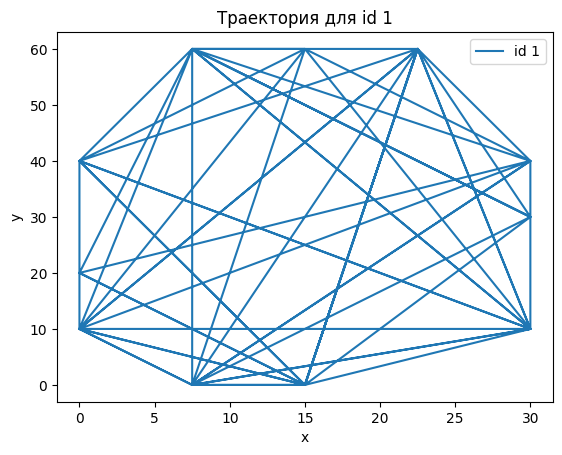

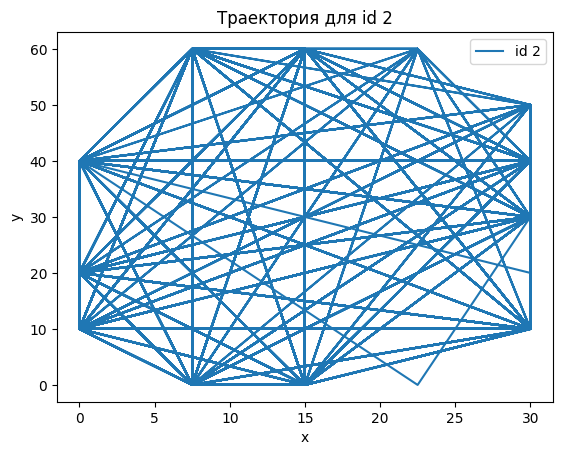

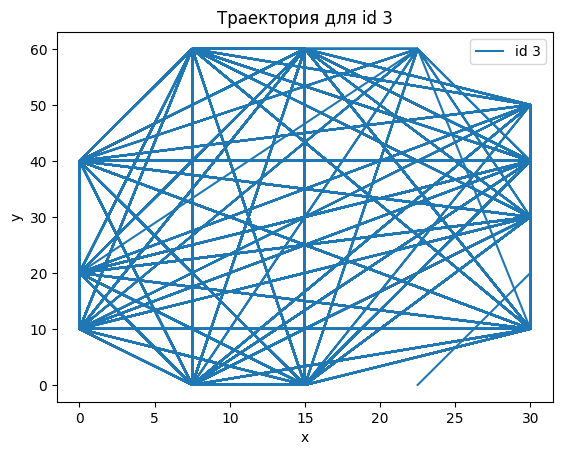

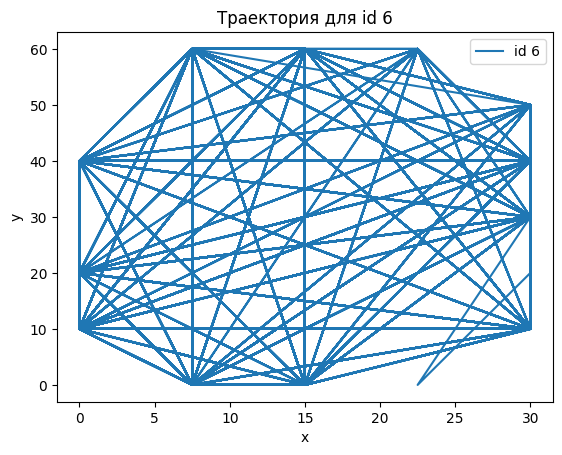

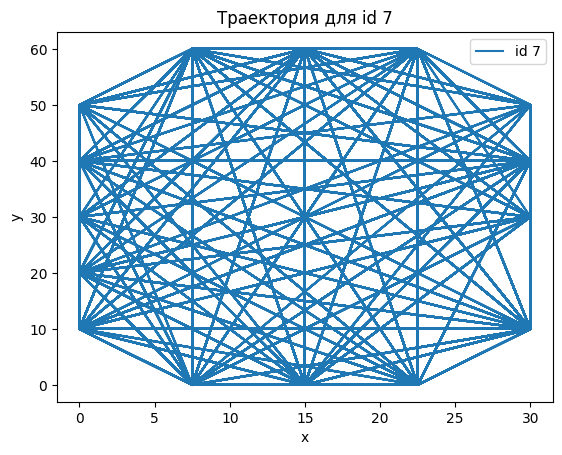

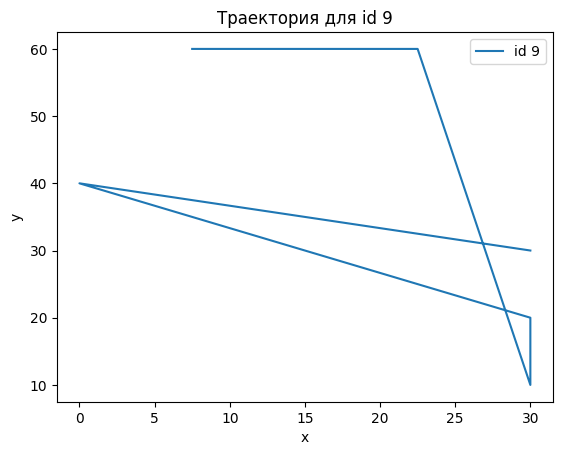

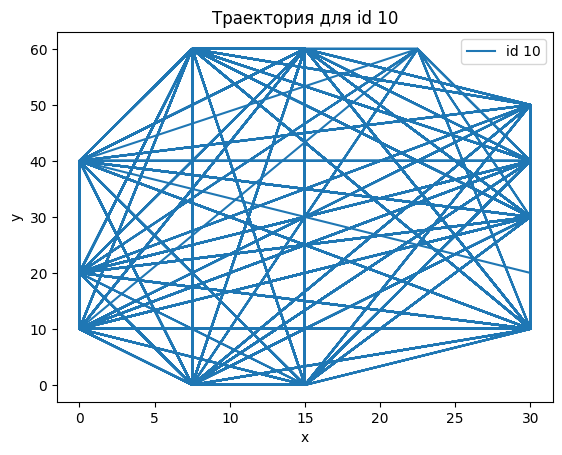

In [26]:
import matplotlib.pyplot as plt

# Создание уникального порядкового номера для каждого id
df['order'] = df.groupby('id').cumcount() + df.groupby('id').cumcount().add(1) / 1000

# Сортировка DataFrame по 'order' и 'id'
df.sort_values(['id', 'order'], inplace=True)

# Группировка данных по id
grouped = df.groupby('id')

# Создание отдельного графика для каждого id
for name, group in grouped:
    plt.figure()
    plt.plot(group['x'], group['y'], label=f'id {name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Траектория для id {name}')
    plt.legend()
    plt.show()


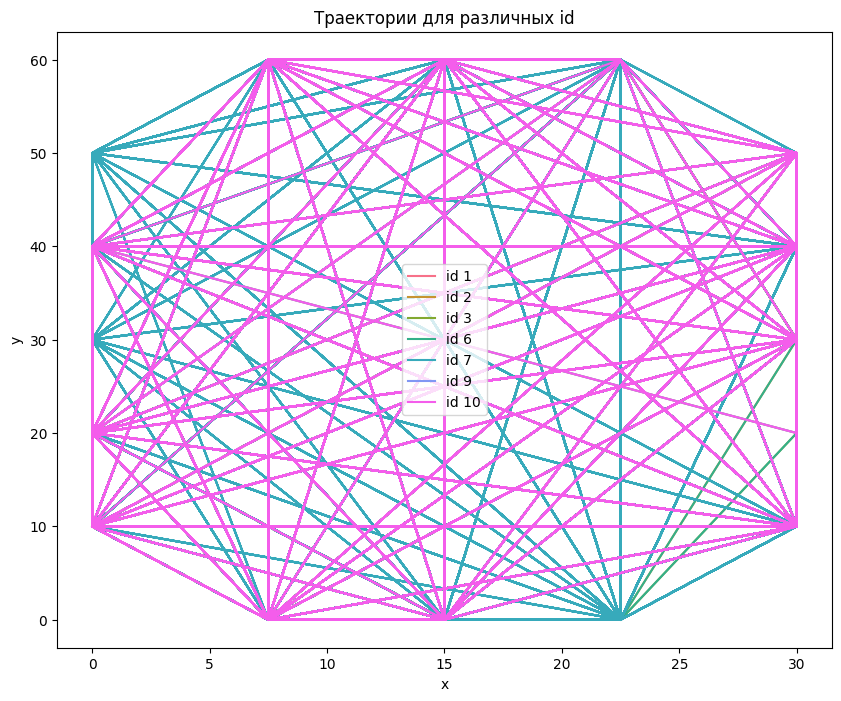

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns  # Подключение seaborn для лучшего визуального представления

# Создание уникального порядкового номера для каждого id
df['order'] = df.groupby('id').cumcount() + df.groupby('id').cumcount().add(1) / 1000

# Сортировка DataFrame по 'order' и 'id'
df.sort_values(['id', 'order'], inplace=True)

# Создание цветовой палитры для различных id
palette = sns.color_palette("husl", n_colors=len(df['id'].unique()))

# Рисование траекторий в одном графике с использованием цветов
plt.figure(figsize=(10, 8))
for i, (name, group) in enumerate(df.groupby('id')):
    plt.plot(group['x'], group['y'], label=f'id {name}', color=palette[i])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Траектории для различных id')
plt.legend()
plt.show()


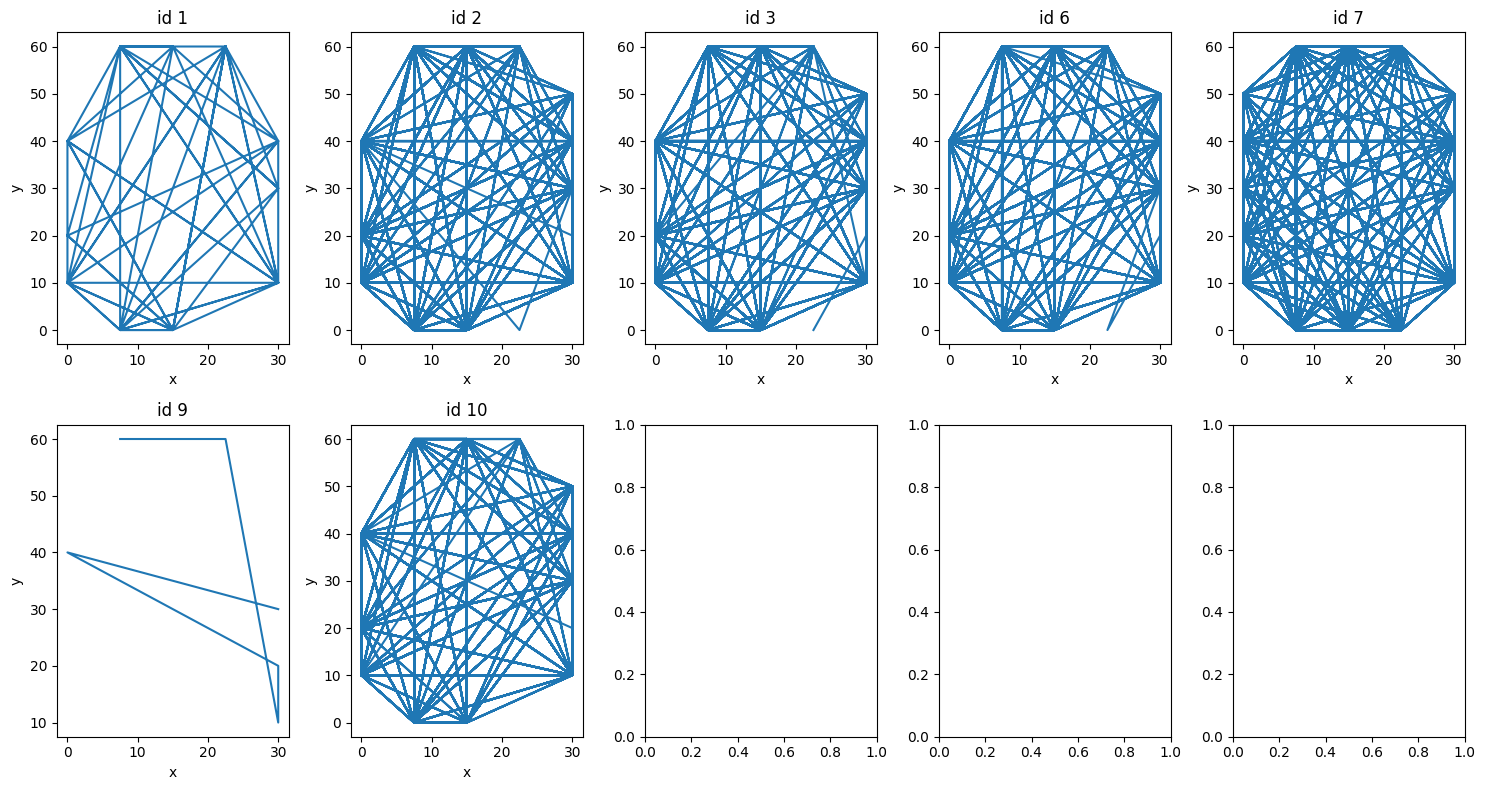

In [28]:
import matplotlib.pyplot as plt

# Подготовка данных (ваш DataFrame df уже должен быть создан)

# Создание уникального порядкового номера для каждого id
df['order'] = df.groupby('id').cumcount() + df.groupby('id').cumcount().add(1) / 1000

# Сортировка DataFrame по 'order' и 'id'
df.sort_values(['id', 'order'], inplace=True)

# Создание 10 графиков в одном рисунке
fig, axes = plt.subplots(2, 5, figsize=(15, 8))  # 2 строки, 5 столбцов

for i, (ax, (name, group)) in enumerate(zip(axes.flatten(), df.groupby('id'))):
    ax.plot(group['x'], group['y'])
    ax.set_title(f'id {name}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# Регулировка макета и отображение графиков
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd

# Прочитать данные из файла
with open('sended.txt', 'r') as file:
    lines = file.readlines()

keys = [line.split("'")[1] for line in lines if "'" in line]

# Преобразовать ключи в формат datetime
datetime_values = pd.to_datetime(keys, unit='s')  # предполагая, что значения ключей представляют собой временные метки UNIX

# Вывести результат
print(datetime_values)



DatetimeIndex(['2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-29 14:41:04', '2024-01-29 14:41:04',
               '2024-01-

C:\Users\kingo\AppData\Local\Temp\ipykernel_5908\338862994.py:10: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  datetime_values = pd.to_datetime(keys, unit='s')  # предполагая, что значения ключей представляют собой временные метки UNIX


In [33]:
import pandas as pd
from datetime import datetime

# Загрузка данных из CSV файла
df = pd.read_csv('log_datime.csv')

# Преобразование столбца 'datetime' в формат datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')


# Выбор записей в указанном временном интервале (дата 2024-01-29)
start_time = datetime.strptime('2024-01-29 14:27:00', '%Y-%m-%d %H:%M:%S')
end_time = datetime.strptime('2024-01-29 14:30:00', '%Y-%m-%d %H:%M:%S')
selected_rows = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]



# Сохранение выбранных записей в отдельный CSV файл
selected_rows.to_csv('period.csv', index=False)

In [3]:
import pandas as pd
from ast import literal_eval
from datetime import datetime

# Открываем файл для чтения
input_file_path = 'logs.txt'

# Создаем пустой DataFrame
df = pd.DataFrame(columns=['backend', 'id', 'x', 'y', 'timestamp', 'datetime'])

# Читаем строки из входного файла
with open(input_file_path, 'r') as input_file:
    for line in input_file:
        # Проверяем наличие символа "|" в строке
        if '|' in line:
            try:
                # Разбираем строки с использованием literal_eval для безопасного преобразования строки в словарь
                data = literal_eval(line.split('|')[1].strip())

                # Извлекаем значения из словаря
                backend = line.split('|')[0].strip()
                id_value = data.get('id')
                x = float(data.get('x', 0))
                y = float(data.get('y', 0))
                timestamp = int(data.get('timestamp', 0))

                # Преобразуем timestamp в datetime
                datetime_value = datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

                # Создаем временный DataFrame
                temp_df = pd.DataFrame({'backend': [backend], 'id': [id_value], 'x': [x], 'y': [y], 'timestamp': [timestamp], 'datetime': [datetime_value]})
                
                # Используем pd.concat для объединения временного DataFrame с основным DataFrame
                df = pd.concat([df, temp_df], ignore_index=True)
            except (ValueError, SyntaxError, KeyError):
                # Пропускаем строки, которые не соответствуют формату словаря
                pass

# Записываем DataFrame в CSV файл
output_csv_path = 'output.csv'
df.to_csv(output_csv_path, index=False)

print(f'Data has been successfully parsed and written to {output_csv_path}')


Data has been successfully parsed and written to output.csv
